In [1]:
# 1. data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. improvement
# 7. Website
# 8. Deploy

In [1]:
import pandas as pd
df= pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.sample(5)

,v1,v2
3687,ham,I'll meet you in the lobby
913,ham,Ok lor but not too early. Me still having proj...
322,ham,cud u tell ppl im gona b a bit l8 cos 2 buses ...
4593,ham,I had a good time too. Its nice to do somethin...
894,ham,Doesn't g have class early tomorrow and thus s...


In [7]:
 # Rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3001,ham,"Excellent, I'll see what riley's plans are"
4302,ham,Yup i'm free...
4751,ham,Well boy am I glad G wasted all night at apple...
1227,ham,So Ì_'ll be submitting da project tmr rite?
4373,ham,K and you're sure I don't have to have consent...


In [8]:
#label encoding

from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,text
2455,0,"Abeg, make profit. But its a start. Are you us..."
4000,0,He's just gonna worry for nothing. And he won'...
1240,0,Oh yes I can speak txt 2 u no! Hmm. Did u get ...
1620,0,"Fuck babe, I miss you sooooo much !! I wish yo..."
2958,0,Buzzzz! *grins* Did I buzz your ass? Buzz your...


In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for Duplicate values
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.shape

(5169, 2)

 ## 2. EDA(Explore data analysis)

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x16ae1931580>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

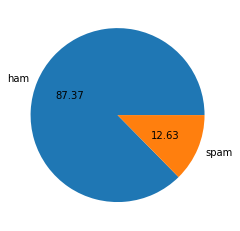

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [463]:
# Data is imbalanced

In [20]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zunai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# Number of sentence
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# for ham msg describe
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# for spam msg describe
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

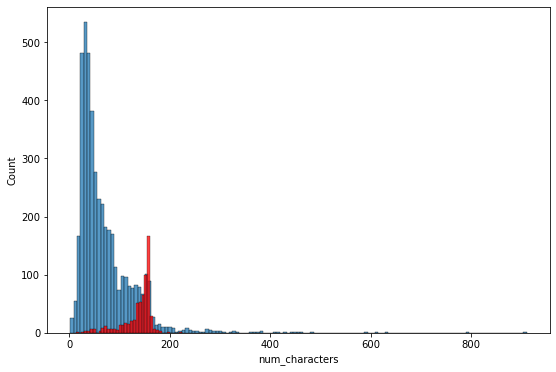

In [33]:
plt.figure(figsize=(9,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

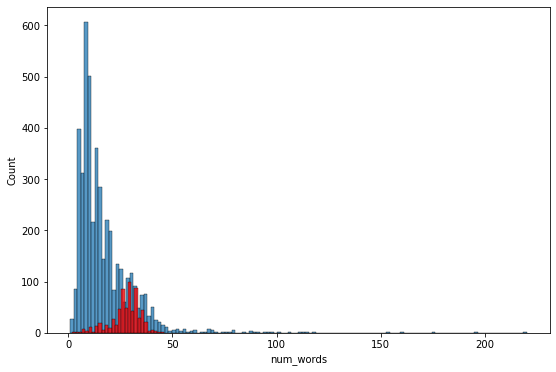

In [34]:
plt.figure(figsize=(9,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

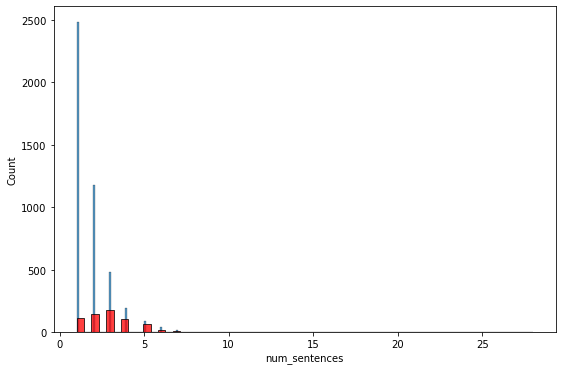

In [35]:
plt.figure(figsize=(9,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

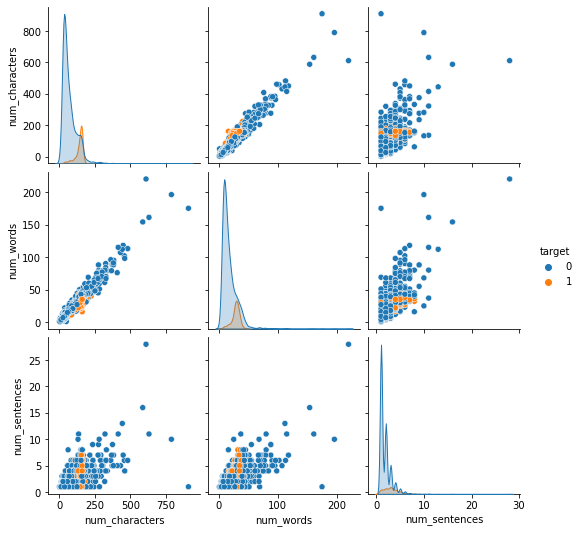

In [36]:
sns.pairplot(df,hue='target')

In [37]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

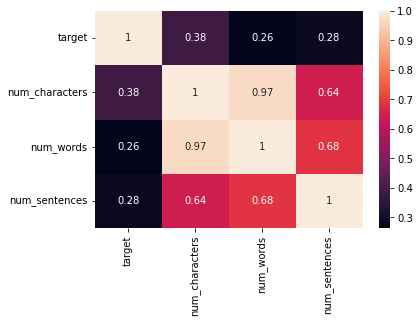

In [38]:
sns.heatmap(df.corr(),annot=True)

##  Data preprocessing
#### > lowerr case
#### > Tokenization
#### > Remove Special Character
#### > Removing stop words and punctuation
#### > Stemming

In [39]:
from nltk.corpus import stopwords
import string

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zunai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('shauwaing')

'shauwa'

In [41]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)#return as string

In [42]:
#Removing stopwords
from nltk.corpus import stopwords
# stopwords.words('english')

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zunai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
transform_text('Did you liked my result on 11 semester??')

'like result 11 semest'

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('shauwaing')

'shauwa'

In [46]:
# transform data set to data processing
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [47]:
df['transform_text']= df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

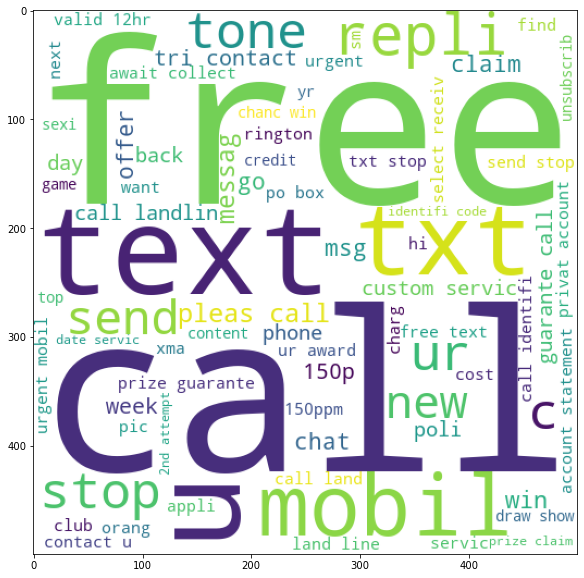

In [51]:
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

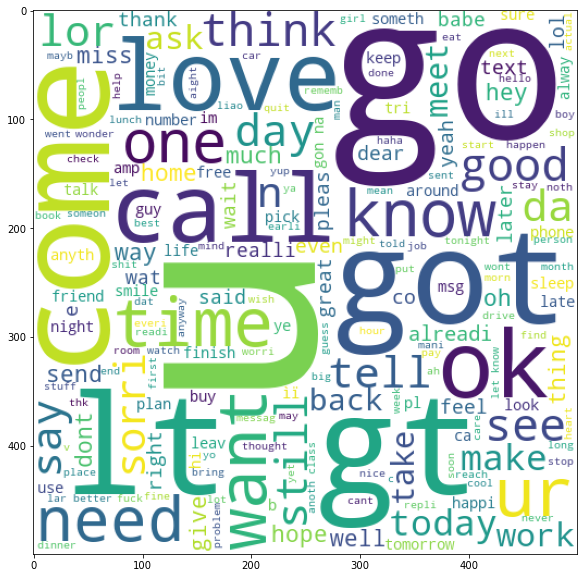

In [53]:
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
df[df['target']==1]['transform_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transform_text, Length: 653, dtype: object

In [500]:
# df.drop(columns='transform')

In [56]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

C:\Users\zunai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

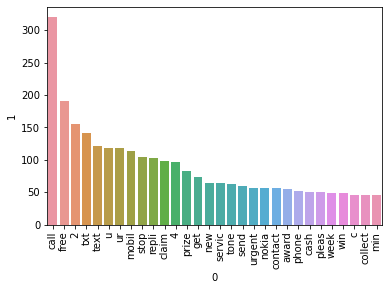

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

In [59]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [60]:
#for ham
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35394

C:\Users\zunai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

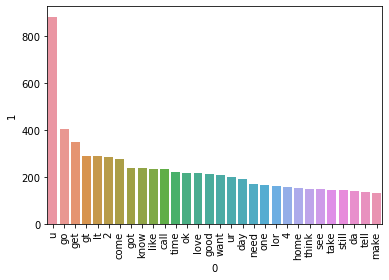

In [62]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

# 4. Model building

In [169]:
#In text data nayeb bayes gives good performance
#nayeb  bayes wants input in number. so we have to convert text in vectors

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [170]:
# X = cv.fit_transform(df['transform_text']).toarray()
X = tfidf.fit_transform(df['transform_text']).toarray()

In [171]:
X.shape

(5169, 3000)

In [118]:
# #scalling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [139]:
# # appending the num of character column to X
# import numpy as np
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [172]:
y = df['target'].values

In [173]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [174]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [177]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [427]:
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()

In [408]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

0.8945841392649904
[[806  90]
 [ 19 119]]
0.569377990430622


In [178]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [410]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [411]:
# tfidf -> MNB

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [147]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear', penalty ='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc= BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt =GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [148]:
clfs ={
    
    'SVC' : svc,
    'KN' : knc,
    'NB' :mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' :xgb
}

In [149]:
def train_classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
#     confusion = confusion_matrix(y_test,y_pred)
    return accuracy,precision

In [93]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [150]:
accuracy_scores = []
precision_scores = []
# confusion_matrix =[]
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("FOR ",name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)
#     print("Confusion Matrix: ",current_confusion)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
#     confusion_matrix.append(current_confusion)

C:\Users\zunai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


FOR  SVC
Accuracy:  0.8665377176015474
Precision:  0.0
FOR  KN
Accuracy:  0.9274661508704062
Precision:  0.7739130434782608
FOR  NB
Accuracy:  0.9410058027079303
Precision:  1.0
FOR  DT
Accuracy:  0.9535783365570599
Precision:  0.835820895522388
FOR  LR
Accuracy:  0.9613152804642167
Precision:  0.9622641509433962
FOR  RF
Accuracy:  0.9680851063829787
Precision:  0.981651376146789
FOR  AdaBoost
Accuracy:  0.9642166344294004
Precision:  0.9316239316239316
FOR  Bgc
Accuracy:  0.9661508704061895
Precision:  0.8992248062015504
FOR  ETC
Accuracy:  0.9806576402321083
Precision:  0.9758064516129032
FOR  GBDT
Accuracy:  0.9516441005802708
Precision:  0.9313725490196079


C:\Users\zunai\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:33:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
FOR  xgb
Accuracy:  0.9709864603481625
Precision:  0.9426229508196722


In [95]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy':accuracy_scores,'Precision': precision_scores})

In [96]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.953578,0.821429
4,LR,0.951644,0.940000
5,RF,0.973888,1.000000
6,AdaBoost,0.961315,0.945455
7,Bgc,0.958414,0.862595
8,ETC,0.975822,0.982906
9,GBDT,0.952611,0.923810


In [525]:
# performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [526]:
# performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.953578
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.973888
6,AdaBoost,Accuracy,0.961315
7,Bgc,Accuracy,0.958414
8,ETC,Accuracy,0.975822
9,GBDT,Accuracy,0.952611


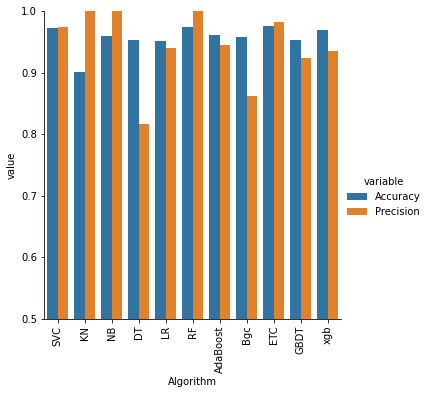

In [527]:
# import seaborn as sns
# sns.catplot(x = 'Algorithm', y='value',
#            hue = 'variable', data=performance_df1, kind='bar', height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation= 'vertical')
# plt.show()

In [219]:
#model Improve
# 1. Change the max_features parameter of TfIDf

In [111]:
temp_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [112]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.946809,0.794326
4,LR,0.958414,0.970297
5,RF,0.974855,0.982759
6,AdaBoost,0.960348,0.929204
7,Bgc,0.957447,0.867188
8,ETC,0.974855,0.974576
9,GBDT,0.947776,0.920000


In [113]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [114]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.974138,0.975822,0.974790
1,KN,0.900387,1.000000,0.905222,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000
3,DT,0.953578,0.821429,0.946809,0.794326
4,LR,0.951644,0.940000,0.958414,0.970297
5,RF,0.973888,1.000000,0.974855,0.982759
6,AdaBoost,0.961315,0.945455,0.960348,0.929204
7,Bgc,0.958414,0.862595,0.957447,0.867188
8,ETC,0.975822,0.982906,0.974855,0.974576
9,GBDT,0.952611,0.923810,0.947776,0.920000


In [287]:
#Scaling Result

In [130]:
# scaler_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [131]:
# scaler_df

,Algorithm,Accuracy_scaling,Precision_scaling
0,SVC,0.966151,0.925620
1,KN,0.905222,0.976190
2,NB,0.978723,0.946154
3,DT,0.949710,0.802817
4,LR,0.967118,0.964286
5,RF,0.974855,0.982759
6,AdaBoost,0.960348,0.929204
7,Bgc,0.957447,0.867188
8,ETC,0.974855,0.974576
9,GBDT,0.947776,0.920000


In [134]:
# new_df.merge(scaler_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.972921,0.974138,0.975822,0.974790,0.966151,0.925620
1,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
2,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
3,DT,0.953578,0.821429,0.946809,0.794326,0.949710,0.802817
4,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
5,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
6,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
7,Bgc,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188
8,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000


In [135]:
# new_df_scaled = new_df.merge(scaler_df,on='Algorithm')

In [392]:
# new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.972921,0.974138,0.866538,0.000000,0.866538,0.000000
1,KN,0.900387,1.000000,0.931335,0.796460,0.931335,0.796460
2,NB,0.959381,1.000000,0.941006,1.000000,0.941006,1.000000
3,DT,0.949710,0.798611,0.947776,0.823077,0.947776,0.823077
4,LR,0.951644,0.940000,0.961315,0.962264,0.961315,0.962264
5,RF,0.973888,1.000000,0.968085,0.981651,0.968085,0.981651
6,AdaBoost,0.961315,0.945455,0.964217,0.931624,0.964217,0.931624
7,Bgc,0.958414,0.862595,0.966151,0.899225,0.966151,0.899225
8,ETC,0.975822,0.982906,0.980658,0.975806,0.980658,0.975806
9,GBDT,0.952611,0.923810,0.951644,0.931373,0.951644,0.931373


In [151]:
scaler_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling_Char':accuracy_scores,'Precision_scaling_char':precision_scores})
scaler_df

,Algorithm,Accuracy_scaling_Char,Precision_scaling_char
0,SVC,0.866538,0.000000
1,KN,0.927466,0.773913
2,NB,0.941006,1.000000
3,DT,0.953578,0.835821
4,LR,0.961315,0.962264
5,RF,0.968085,0.981651
6,AdaBoost,0.964217,0.931624
7,Bgc,0.966151,0.899225
8,ETC,0.980658,0.975806
9,GBDT,0.951644,0.931373


In [152]:
new_df.merge(scaler_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling_Char,Precision_scaling_char
0,SVC,0.972921,0.974138,0.975822,0.974790,0.866538,0.000000
1,KN,0.900387,1.000000,0.905222,1.000000,0.927466,0.773913
2,NB,0.959381,1.000000,0.970986,1.000000,0.941006,1.000000
3,DT,0.953578,0.821429,0.946809,0.794326,0.953578,0.835821
4,LR,0.951644,0.940000,0.958414,0.970297,0.961315,0.962264
5,RF,0.973888,1.000000,0.974855,0.982759,0.968085,0.981651
6,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.964217,0.931624
7,Bgc,0.958414,0.862595,0.957447,0.867188,0.966151,0.899225
8,ETC,0.975822,0.982906,0.974855,0.974576,0.980658,0.975806
9,GBDT,0.952611,0.923810,0.947776,0.920000,0.951644,0.931373


In [153]:
new_df_num_Char = new_df.merge(scaler_df,on='Algorithm')

In [154]:
new_df_num_Char

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling_Char,Precision_scaling_char
0,SVC,0.972921,0.974138,0.975822,0.974790,0.866538,0.000000
1,KN,0.900387,1.000000,0.905222,1.000000,0.927466,0.773913
2,NB,0.959381,1.000000,0.970986,1.000000,0.941006,1.000000
3,DT,0.953578,0.821429,0.946809,0.794326,0.953578,0.835821
4,LR,0.951644,0.940000,0.958414,0.970297,0.961315,0.962264
5,RF,0.973888,1.000000,0.974855,0.982759,0.968085,0.981651
6,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.964217,0.931624
7,Bgc,0.958414,0.862595,0.957447,0.867188,0.966151,0.899225
8,ETC,0.975822,0.982906,0.974855,0.974576,0.980658,0.975806
9,GBDT,0.952611,0.923810,0.947776,0.920000,0.951644,0.931373


In [155]:
#Voting Classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [156]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [157]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [163]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.941972920696325
Precision 1.0


In [165]:
#Applying Stacking
estimators =[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [166]:
from sklearn.ensemble import StackingClassifier

In [167]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [168]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9453125


In [179]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))